## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.129904  1.451565 -0.661364  1.113377 -1.554946  0.955020
1 -0.262585  1.362047  1.318677  0.651888  1.296692  1.805298
2 -0.549704  0.139484  0.703151 -0.754852 -0.920496 -0.779626
3 -1.581371 -1.538128 -0.014633  1.562872  1.082561 -0.177229
4 -0.857858 -1.513179  0.360335 -1.031050 -1.042916 -2.141132


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9929086	total: 69.5ms	remaining: 1m 9s
1:	learn: 0.9821464	total: 70.1ms	remaining: 35s
2:	learn: 0.9710529	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9613112	total: 71.4ms	remaining: 17.8s
4:	learn: 0.9518654	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9427458	total: 72.5ms	remaining: 12s
6:	learn: 0.9318668	total: 73ms	remaining: 10.4s
7:	learn: 0.9232772	total: 73.6ms	remaining: 9.12s
8:	learn: 0.9151447	total: 74.1ms	remaining: 8.15s
9:	learn: 0.9066464	total: 74.6ms	remaining: 7.39s
10:	learn: 0.8981464	total: 75.1ms	remaining: 6.75s
11:	learn: 0.8882276	total: 75.7ms	remaining: 6.23s
12:	learn: 0.8794926	total: 76.2ms	remaining: 5.78s
13:	learn: 0.8712524	total: 76.7ms	remaining: 5.41s
14:	learn: 0.8632621	total: 77.3ms	remaining: 5.08s
15:	learn: 0.8539156	total: 77.8ms	remaining: 4.78s
16:	learn: 0.8455904	total: 78.4ms	remaining: 4.53s
17:	learn: 0.8375670	total: 78.9ms	remaining: 4.3s
18:	learn: 0.8302444	total: 79.4ms	remaining: 4.1s


64:	learn: 0.5458256	total: 110ms	remaining: 1.58s
65:	learn: 0.5412691	total: 111ms	remaining: 1.57s
66:	learn: 0.5359153	total: 111ms	remaining: 1.55s
67:	learn: 0.5314262	total: 112ms	remaining: 1.53s
68:	learn: 0.5258736	total: 112ms	remaining: 1.51s
69:	learn: 0.5221788	total: 113ms	remaining: 1.5s
70:	learn: 0.5176927	total: 113ms	remaining: 1.48s
71:	learn: 0.5139389	total: 113ms	remaining: 1.46s
72:	learn: 0.5098074	total: 114ms	remaining: 1.45s
73:	learn: 0.5050907	total: 114ms	remaining: 1.43s
74:	learn: 0.5005635	total: 115ms	remaining: 1.41s
75:	learn: 0.4970709	total: 115ms	remaining: 1.4s
76:	learn: 0.4934418	total: 115ms	remaining: 1.38s
77:	learn: 0.4894886	total: 116ms	remaining: 1.37s
78:	learn: 0.4865238	total: 116ms	remaining: 1.35s
79:	learn: 0.4822381	total: 117ms	remaining: 1.34s
80:	learn: 0.4778734	total: 117ms	remaining: 1.33s
81:	learn: 0.4737208	total: 118ms	remaining: 1.31s
82:	learn: 0.4693167	total: 118ms	remaining: 1.3s
83:	learn: 0.4653535	total: 119ms	

237:	learn: 0.1536123	total: 188ms	remaining: 601ms
238:	learn: 0.1527055	total: 188ms	remaining: 599ms
239:	learn: 0.1516325	total: 189ms	remaining: 597ms
240:	learn: 0.1506601	total: 189ms	remaining: 595ms
241:	learn: 0.1495635	total: 189ms	remaining: 593ms
242:	learn: 0.1487411	total: 190ms	remaining: 592ms
243:	learn: 0.1477812	total: 190ms	remaining: 590ms
244:	learn: 0.1469037	total: 191ms	remaining: 589ms
245:	learn: 0.1457956	total: 191ms	remaining: 587ms
246:	learn: 0.1448198	total: 192ms	remaining: 585ms
247:	learn: 0.1440646	total: 193ms	remaining: 584ms
248:	learn: 0.1430703	total: 193ms	remaining: 582ms
249:	learn: 0.1421465	total: 193ms	remaining: 580ms
250:	learn: 0.1410225	total: 194ms	remaining: 579ms
251:	learn: 0.1402891	total: 194ms	remaining: 577ms
252:	learn: 0.1393794	total: 195ms	remaining: 575ms
253:	learn: 0.1385142	total: 195ms	remaining: 573ms
254:	learn: 0.1377346	total: 195ms	remaining: 571ms
255:	learn: 0.1368173	total: 196ms	remaining: 569ms
256:	learn: 

463:	learn: 0.0530932	total: 293ms	remaining: 338ms
464:	learn: 0.0528532	total: 293ms	remaining: 338ms
465:	learn: 0.0524225	total: 294ms	remaining: 337ms
466:	learn: 0.0520627	total: 294ms	remaining: 336ms
467:	learn: 0.0518556	total: 295ms	remaining: 335ms
468:	learn: 0.0515159	total: 295ms	remaining: 334ms
469:	learn: 0.0511632	total: 296ms	remaining: 333ms
470:	learn: 0.0510221	total: 296ms	remaining: 332ms
471:	learn: 0.0506985	total: 296ms	remaining: 332ms
472:	learn: 0.0503552	total: 297ms	remaining: 331ms
473:	learn: 0.0502177	total: 297ms	remaining: 330ms
474:	learn: 0.0498677	total: 298ms	remaining: 329ms
475:	learn: 0.0495328	total: 298ms	remaining: 328ms
476:	learn: 0.0492144	total: 299ms	remaining: 327ms
477:	learn: 0.0488570	total: 299ms	remaining: 327ms
478:	learn: 0.0487255	total: 300ms	remaining: 326ms
479:	learn: 0.0483950	total: 300ms	remaining: 325ms
480:	learn: 0.0480748	total: 301ms	remaining: 324ms
481:	learn: 0.0477901	total: 301ms	remaining: 324ms
482:	learn: 

627:	learn: 0.0247416	total: 371ms	remaining: 220ms
628:	learn: 0.0246264	total: 372ms	remaining: 219ms
629:	learn: 0.0245366	total: 372ms	remaining: 219ms
630:	learn: 0.0244897	total: 373ms	remaining: 218ms
631:	learn: 0.0244542	total: 373ms	remaining: 217ms
632:	learn: 0.0243822	total: 374ms	remaining: 217ms
633:	learn: 0.0243476	total: 374ms	remaining: 216ms
634:	learn: 0.0242231	total: 374ms	remaining: 215ms
635:	learn: 0.0241662	total: 375ms	remaining: 215ms
636:	learn: 0.0240310	total: 375ms	remaining: 214ms
637:	learn: 0.0239902	total: 376ms	remaining: 213ms
638:	learn: 0.0239570	total: 376ms	remaining: 213ms
639:	learn: 0.0239245	total: 377ms	remaining: 212ms
640:	learn: 0.0237927	total: 377ms	remaining: 211ms
641:	learn: 0.0237609	total: 377ms	remaining: 210ms
642:	learn: 0.0236414	total: 378ms	remaining: 210ms
643:	learn: 0.0235051	total: 378ms	remaining: 209ms
644:	learn: 0.0234209	total: 379ms	remaining: 209ms
645:	learn: 0.0233520	total: 379ms	remaining: 208ms
646:	learn: 

857:	learn: 0.0116122	total: 476ms	remaining: 78.8ms
858:	learn: 0.0115979	total: 477ms	remaining: 78.3ms
859:	learn: 0.0115556	total: 478ms	remaining: 77.8ms
860:	learn: 0.0114867	total: 478ms	remaining: 77.2ms
861:	learn: 0.0114191	total: 478ms	remaining: 76.6ms
862:	learn: 0.0113527	total: 479ms	remaining: 76ms
863:	learn: 0.0113324	total: 479ms	remaining: 75.4ms
864:	learn: 0.0112673	total: 480ms	remaining: 74.9ms
865:	learn: 0.0112409	total: 480ms	remaining: 74.3ms
866:	learn: 0.0112272	total: 480ms	remaining: 73.7ms
867:	learn: 0.0112072	total: 481ms	remaining: 73.1ms
868:	learn: 0.0111516	total: 481ms	remaining: 72.6ms
869:	learn: 0.0111260	total: 482ms	remaining: 72ms
870:	learn: 0.0110719	total: 482ms	remaining: 71.4ms
871:	learn: 0.0110525	total: 483ms	remaining: 70.9ms
872:	learn: 0.0110287	total: 483ms	remaining: 70.3ms
873:	learn: 0.0110091	total: 484ms	remaining: 69.7ms
874:	learn: 0.0109838	total: 484ms	remaining: 69.2ms
875:	learn: 0.0109706	total: 485ms	remaining: 68.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

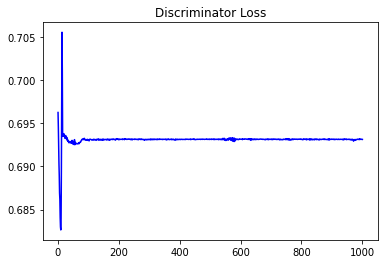

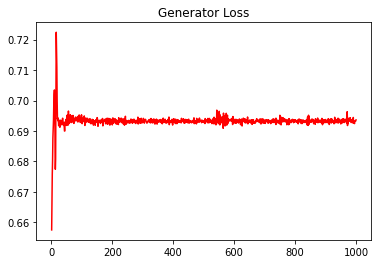

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.166321073621473


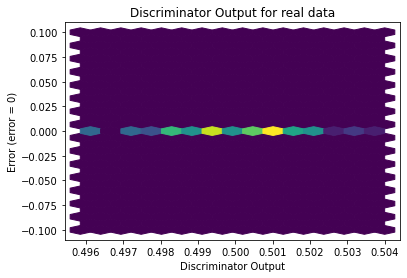

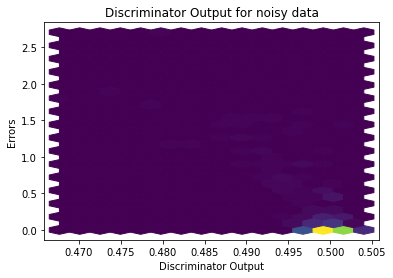

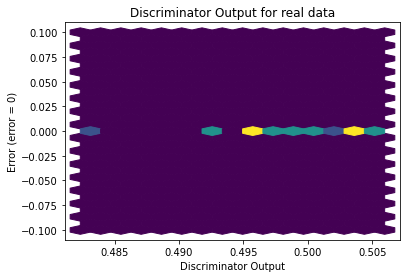

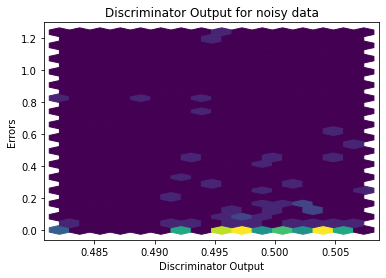

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


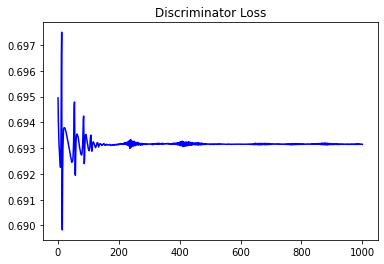

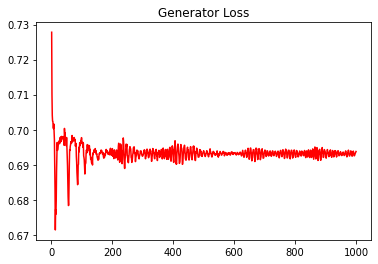

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21020116280940568


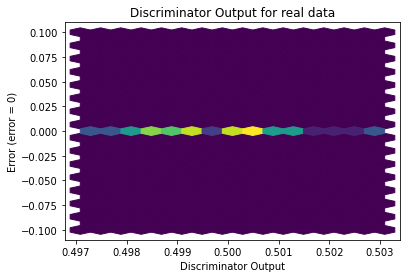

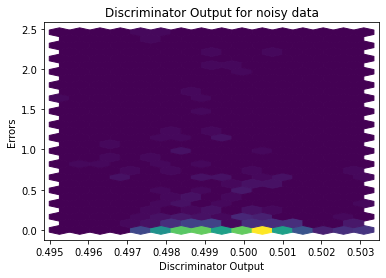

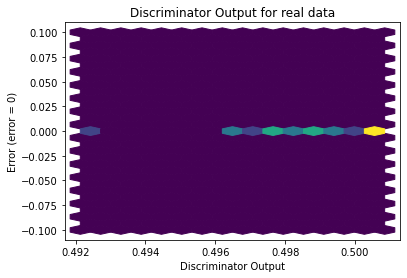

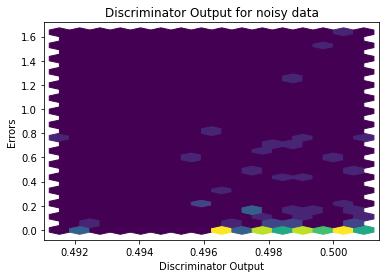

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0429]], requires_grad=True)
